In [1]:
import pandas as pd
import numpy as np

# used for QQ Plot
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
# import data
df = pd.read_csv('../Day19/train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### Handle missing values

In [8]:
# Handle missing values
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
# Fill missing values in age with the mean of the column
# Using pandas fillna function
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipykernel_66739/1691409889.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### Split input and output columns

In [ ]:
x = df.iloc[:, 1:3]
y = df.iloc[:, 0]

(891,)

#### Train Test Split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Plot figures

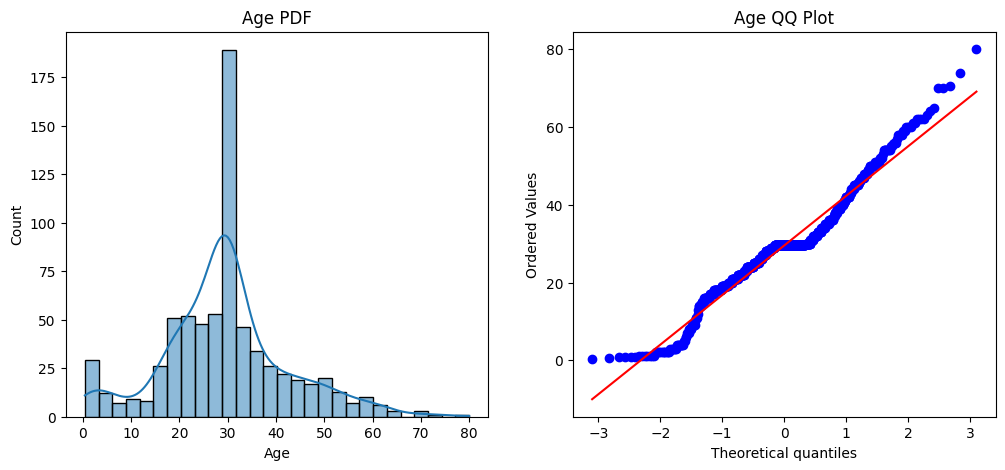

Data is little close to normal distribution


In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(x_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(1, 2, 2)
stats.probplot(x_train['Age'], dist='norm', plot = plt)
plt.title('Age QQ Plot')

plt.show()

print("Data is little close to normal distribution")

### Off topic, KDE vs Histograms

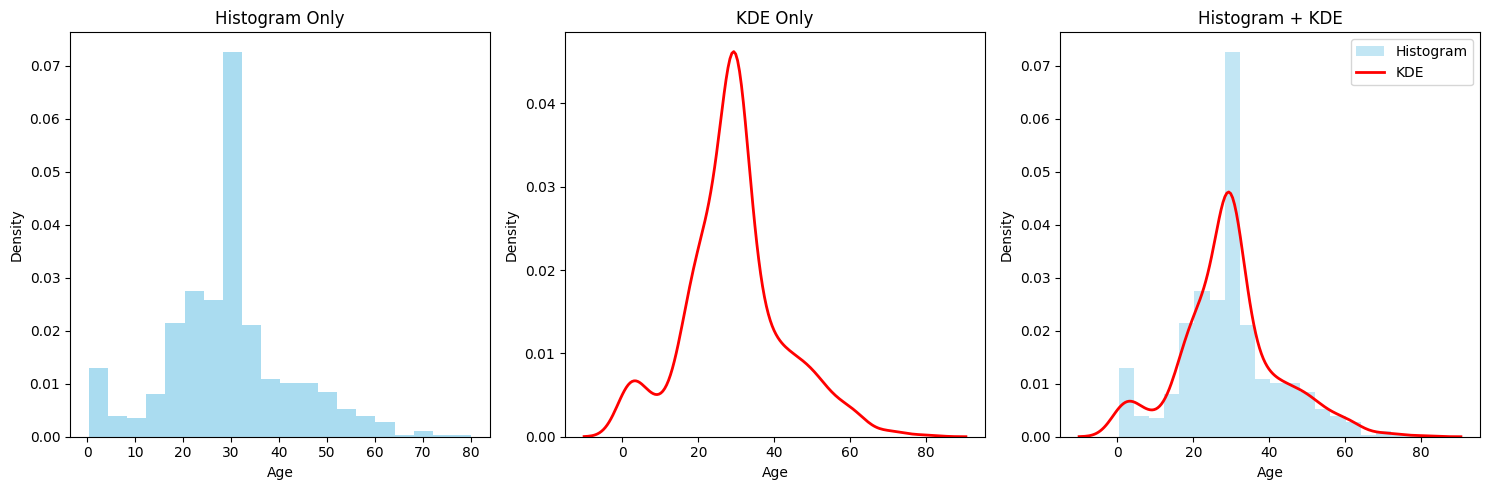

Key Differences:
📊 Histogram: Shows actual data frequency in bins (choppy)
📈 KDE: Estimates smooth probability density curve
🎯 Together: Best of both - see actual data + smooth trend


In [19]:
# Demonstrate KDE vs Histogram
plt.figure(figsize=(15, 5))

# Same data, different representations
data = x_train['Age']

# Subplot 1: Histogram only
plt.subplot(1, 3, 1)
plt.hist(data, bins=20, density=True, alpha=0.7, color='skyblue')
plt.title('Histogram Only')
plt.xlabel('Age')
plt.ylabel('Density')

# Subplot 2: KDE only
plt.subplot(1, 3, 2)
sns.kdeplot(data, color='red', linewidth=2)
plt.title('KDE Only')
plt.xlabel('Age')
plt.ylabel('Density')

# Subplot 3: Both together
plt.subplot(1, 3, 3)
plt.hist(data, bins=20, density=True, alpha=0.5, color='skyblue', label='Histogram')
sns.kdeplot(data, color='red', linewidth=2, label='KDE')
plt.title('Histogram + KDE')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

print("Key Differences:")
print("📊 Histogram: Shows actual data frequency in bins (choppy)")
print("📈 KDE: Estimates smooth probability density curve")
print("🎯 Together: Best of both - see actual data + smooth trend")

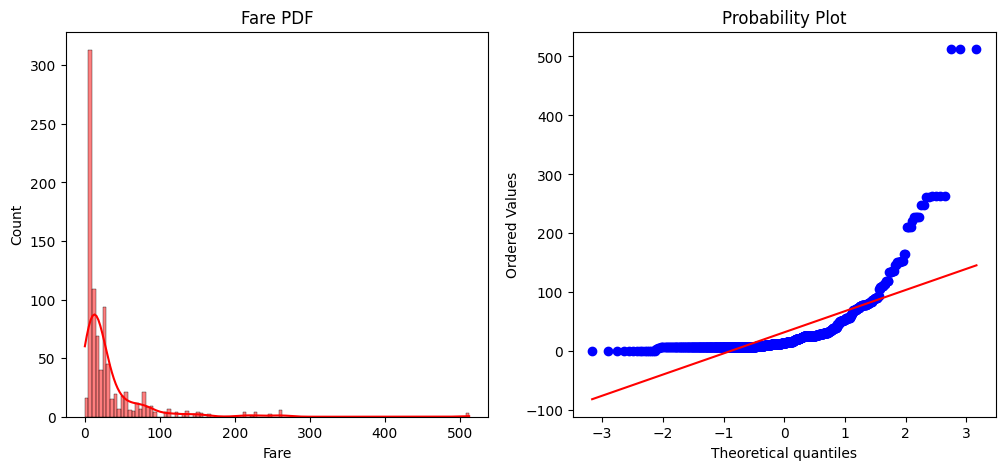

Data is right skewed
Log transform would help here


In [27]:
# Fare column distribution
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df['Fare'], kde=True, color='red')
plt.title('Fare PDF')

plt.subplot(1, 2, 2)
stats.probplot(df['Fare'], dist='norm', plot=plt)
plt.show()

print("Data is right skewed")
print("Log transform would help here")

### Lets try without any transforms

In [28]:
# Make two objects, one for Logistic regression and one for Decision tree
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [35]:
# Train the models on x_train
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
# Predict the values and check the accuracy

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print("Accuracy LR: ", accuracy_score(y_test, y_pred) * 100)
print("Accuracy DT: ", accuracy_score(y_test, y_pred2) * 100)


Accuracy LR:  64.80446927374301
Accuracy DT:  67.0391061452514


### Try Log transform on both Age and Fare columns

In [45]:
trf = FunctionTransformer(func= np.log1p) # np.log1p = Log(1 + x)

In [46]:
# Transform the values
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [47]:
# Now again train the model on transformed data
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [50]:
# Train the models
clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

# predict the values
y_pred = clf.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

# Print the accuracies
print("Accuracy LR: ", accuracy_score(y_test, y_pred) * 100, "(Improved by 4%)")
print("Accuracy DT: ", accuracy_score(y_test, y_pred2) * 100)

Accuracy LR:  68.15642458100558 (Improved by 4%)
Accuracy DT:  69.27374301675978


### Cross validate the results

In [52]:
x_transformed = trf.transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR:", np.mean(cross_val_score(clf, x_transformed, y, scoring='accuracy', cv=10)) * 100, "(Improved by around 3-4%)")
print("DT:", np.mean(cross_val_score(clf2, x_transformed, y, scoring='accuracy', cv=10)) * 100)

LR: 67.80274656679151 (Improved by around 3-4%)
DT: 65.66167290886392


## Columns comparison before vs after transformation

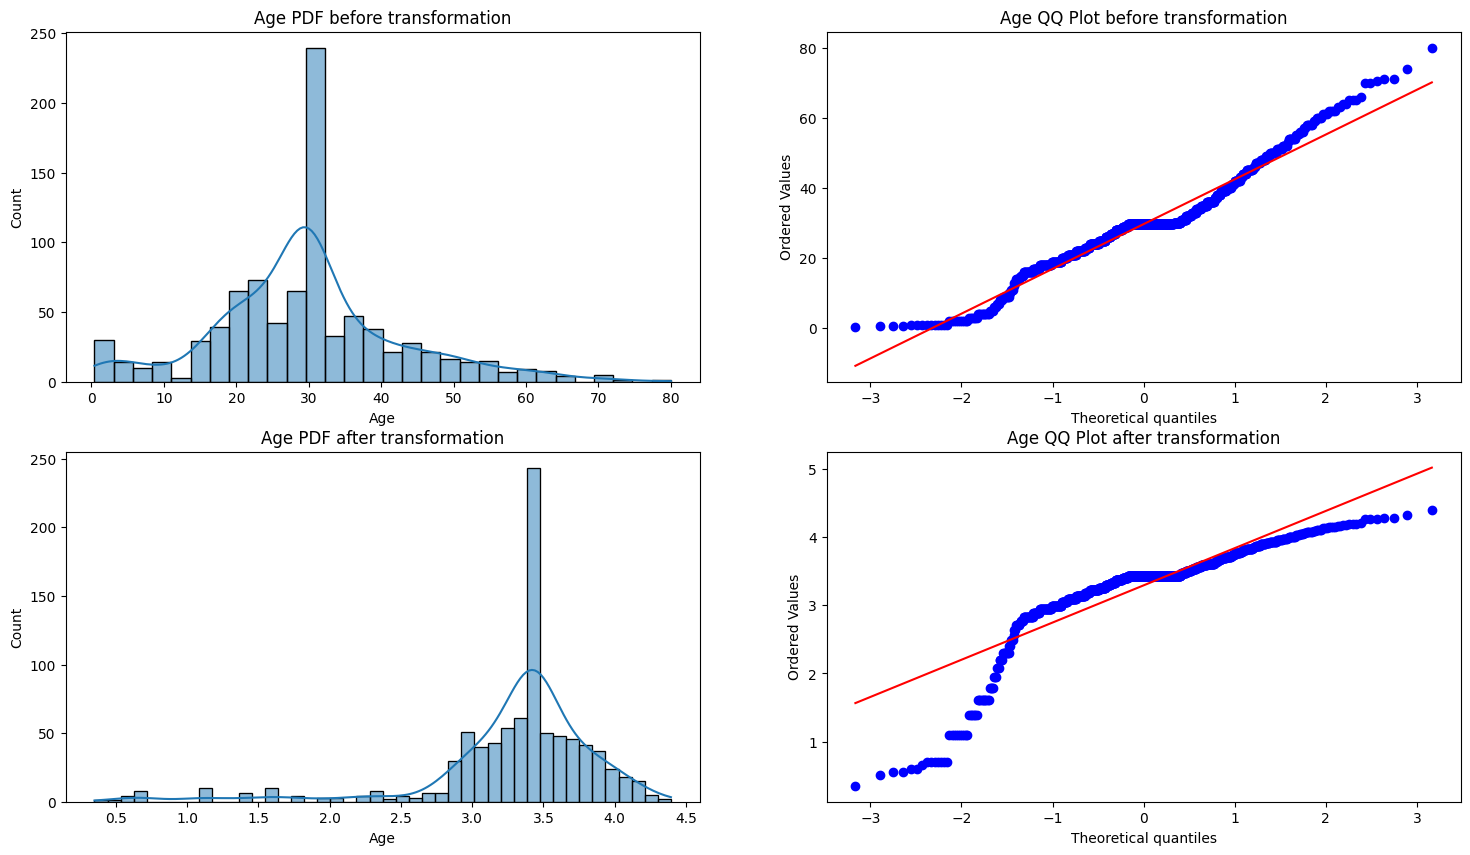

In [64]:
plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
sns.histplot(x['Age'], kde=True)
plt.title("Age PDF before transformation")

plt.subplot(2, 2, 2)
stats.probplot(x['Age'], dist='norm', plot=plt)
plt.title("Age QQ Plot before transformation")

plt.subplot(2, 2, 3)
sns.histplot(x_transformed['Age'], kde=True)
plt.title("Age PDF after transformation")

plt.subplot(2, 2, 4)
stats.probplot(x_transformed['Age'], dist='norm', plot=plt)
plt.title("Age QQ Plot after transformation")

plt.show()

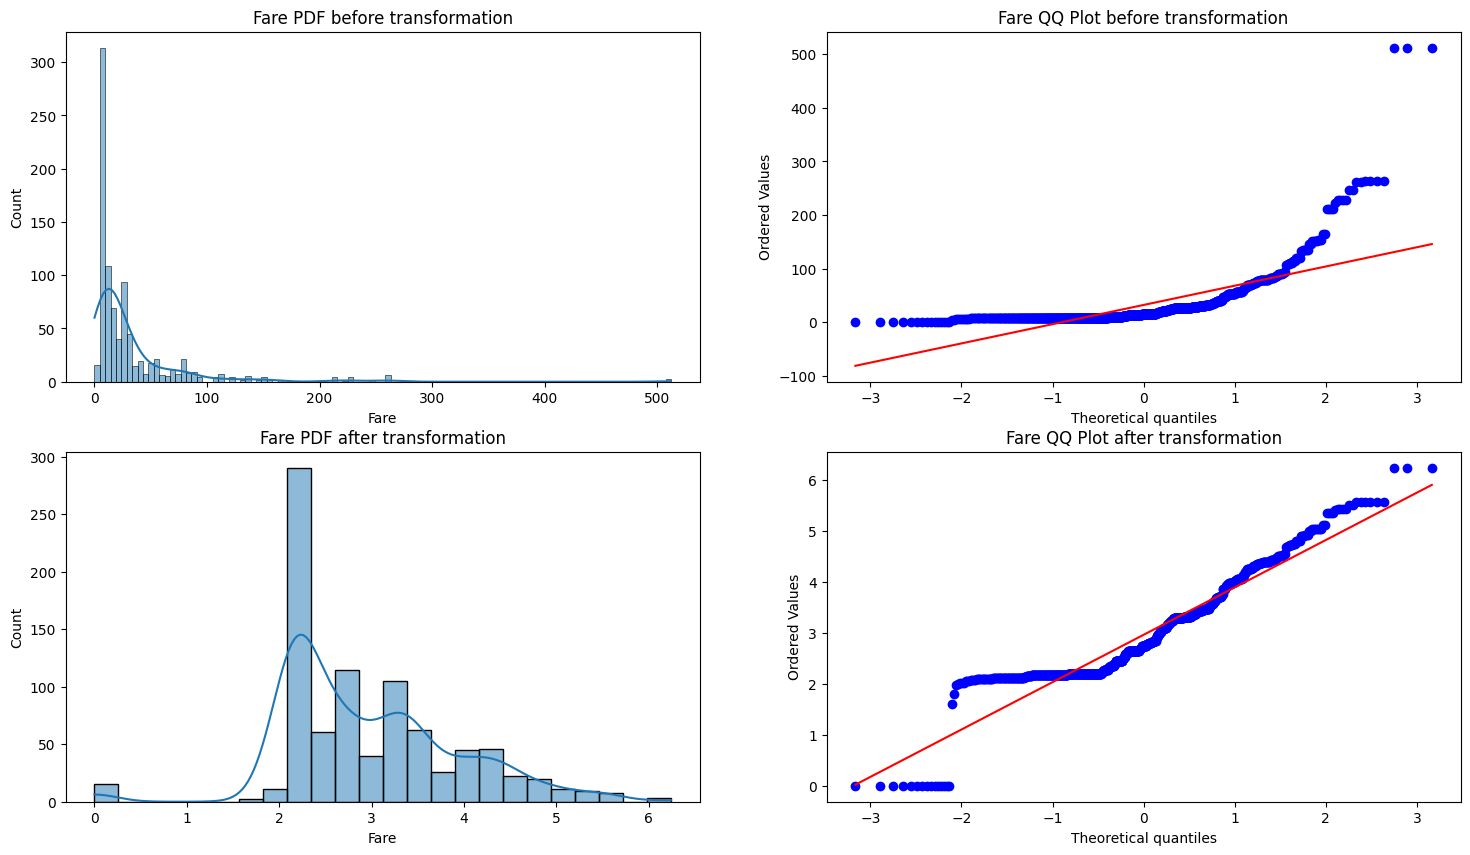

In [61]:
plt.figure(figsize=(18,10))

plt.subplot(2, 2, 1)
sns.histplot(x['Fare'], kde=True)
plt.title("Fare PDF before transformation")

plt.subplot(2, 2, 2)
stats.probplot(x['Fare'], dist='norm', plot=plt)
plt.title("Fare QQ Plot before transformation")

plt.subplot(2, 2, 3)
sns.histplot(x_transformed['Fare'], kde=True)
plt.title("Fare PDF after transformation")

plt.subplot(2, 2, 4)
stats.probplot(x_transformed['Fare'], dist='norm', plot=plt)
plt.title("Fare QQ Plot after transformation")

plt.show()

**Age column became worse on applying transformation**

### Lets only apply Log transform on Fare column

In [65]:
trf2 = ColumnTransformer([
    ('Log Transformer', FunctionTransformer(func=np.log1p), ['Fare'])
], remainder='passthrough')

In [66]:
x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.fit_transform(x_test)

In [67]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2, y_train)
clf2.fit(x_train_transformed2, y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)

print("LR:", accuracy_score(y_pred, y_test) * 100)
print("DT:", accuracy_score(y_pred2, y_test) * 100)

LR: 67.0391061452514
DT: 68.71508379888269


**Kinda at the same level** 

In [68]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

## Key takeaways
- Logistic Regression performed better when we normalised the data
- Decision tree never got affected